In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm, truncexpon

## parameter ranges
mrange = (0,100)
trange = (0,10)

## true parameter values
mmu = 50
msg = 5
mlb = 0.01

tmu = 0
tsg = 2
tlb = 0.25

## S/B ratio
z = 0.5

## define our true p.d.f.s
## f(m,t) = z * gs(m) * hs(t) + (1-z) * gb(m) * hb(t)

# signal mass pdf
def gs(x, mu, sg):
    xmin = (mrange[0] - mu) / sg
    xmax = (mrange[1] - mu) / sg
    return truncnorm.pdf(x, xmin, xmax, mu, sg)

# background mass pdf
def gb(x, lb):
    return truncexpon.pdf(x, mrange[1], mrange[0], 1/lb)

# signal and background mass pdf
def g(x, z, mu, sg, lb):
    sig = gs(x, mu, sg)
    bkg = gb(x, lb)
    return z*sig + (1-z)*bkg

# signal time pdf
def hs(x, lb):
    return truncexpon.pdf(x, trange[1], trange[0], 1/lb)

# background time pdf
def hb(x, mu, sg):
    xmin = (trange[0] - mu) / sg
    xmax = (trange[1] - mu) / sg
    return truncnorm.pdf(x, xmin, xmax, mu, sg)

# signal and background time pdf
def h(x, z, mu, sg, lb):
    sig = hs(x, lb)
    bkg = hb(x, mu, sg)
    return z*sig + (1-z)*bkg


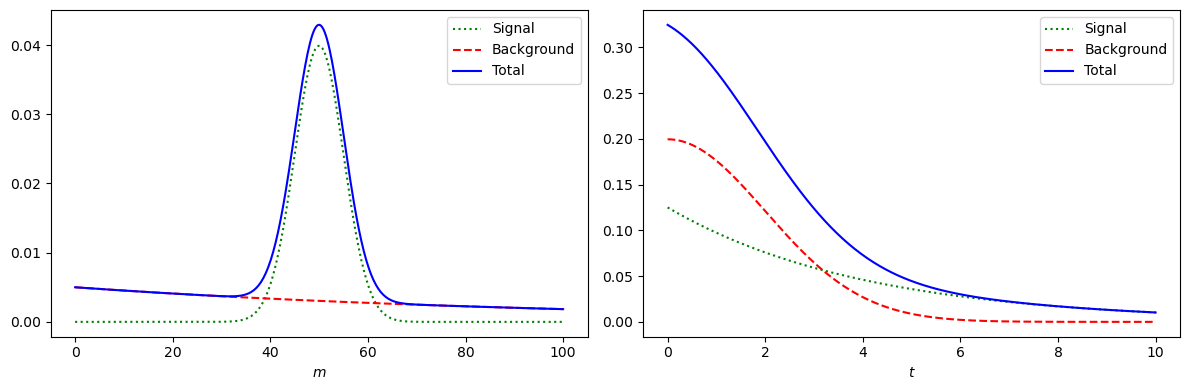

In [56]:
# plot the model
fig, ax = plt.subplots(1,2, figsize=(12,4))

# mass dimension
m = np.linspace(*mrange,400)
ax[0].plot(m, z*gs(m,mmu,msg), 'g:', label='Signal' )
ax[0].plot(m, (1-z)*gb(x,mlb), 'r--', label='Background' )
ax[0].plot(m, g(m,z,mmu,msg,mlb),'b-', label='Total')
ax[0].legend()
ax[0].set_xlabel('$m$')

# time dimension
t = np.linspace(*trange,400)
ax[1].plot(t, z*hs(t,tlb), 'g:', label='Signal' )
ax[1].plot(t, (1-z)*hb(t,tmu,tsg), 'r--', label='Background' )
ax[1].plot(t, h(t,z,tmu,tsg,tlb),'b-', label='Total')
ax[1].legend()
ax[1].set_xlabel('$t$')

fig.tight_layout()


In [60]:
## to generate toys I need to use the inverse cdf (or ppf function) so define those here

# signal mass ppf
def gs_ppf(x, mu, sg):
    xmin = (mrange[0] - mu) / sg
    xmax = (mrange[1] - mu) / sg
    return truncnorm.ppf(x, xmin, xmax, mu, sg)

# background mass ppf
def gb_ppf(x, lb):
    return truncexpon.ppf(x, mrange[1], mrange[0], 1/lb)

# signal time ppf
def hs_ppf(x, lb):
    return truncexpon.ppf(x, trange[1], trange[0], 1/lb)

# background time ppf
def hb_ppf(x, mu, sg):
    xmin = (trange[0] - mu) / sg
    xmax = (trange[1] - mu) / sg
    return truncnorm.ppf(x, xmin, xmax, mu, sg)



In [63]:
## do the generation
Ns = 5000
Nb = 5000

# set reproducible seed
np.random.seed(210187)

# random poisson on observed number
Ns = np.random.poisson(Ns)
Nb = np.random.poisson(Nb)

# mass toys
slin = np.random.uniform(size=Ns)
blin = np.random.uniform(size=Nb)
smass = gs_ppf(slin, mmu, msg)
bmass = gb_ppf(blin, mlb)

# time toys
slin = np.random.uniform(size=Ns)
blin = np.random.uniform(size=Nb)
stime = hs_ppf(slin, tlb)
btime = hb_ppf(blin, tmu, tsg)


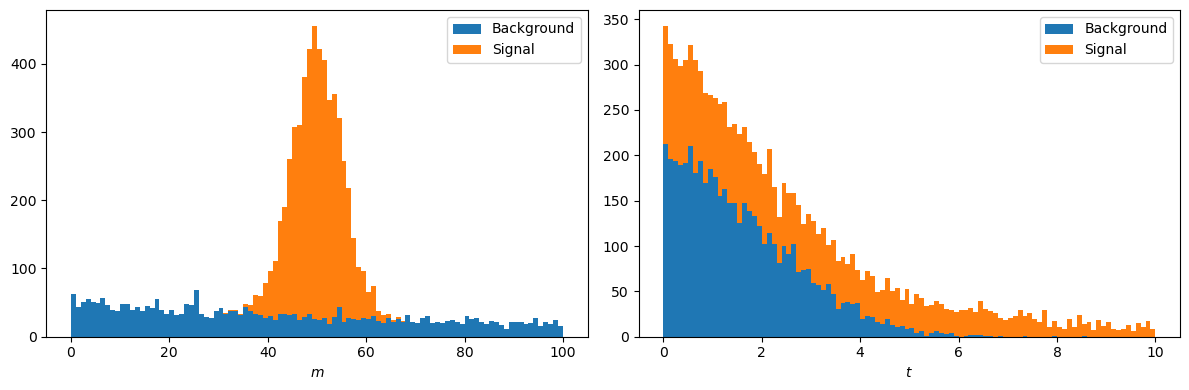

In [67]:
# plot toy
fig, ax = plt.subplots(1,2, figsize=(12,4))
_ = ax[0].hist( [bmass, smass], stacked=True, bins=100, range=mrange, label=['Background','Signal'])
_ = ax[1].hist( [btime, stime], stacked=True, bins=100, range=trange, label=['Background','Signal'])
ax[0].legend()
ax[1].legend()
ax[0].set_xlabel('$m$')
ax[1].set_xlabel('$t$')
fig.tight_layout()